In [1]:
# Método de Euler para y' = -5y + 5t**2 + 2t, y(0) = 1/3, 0 <= t <= 1, N = 10
import numpy as np
from math import exp

# Definir la función f(t, y)
def f(t, y):
    return -5*y + 5*t**2 + 2*t

a = 0
b = 1
y_t0 = 1/3
N = 10

# Usar el método de Euler
# Si tienes el archivo ODE.py, puedes importar la función así:
# from src.ODE import ODE_euler
# Pero aquí la implementamos directamente:
def ODE_euler(a, b, f, y_t0, N):
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]
    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        t += h
        ys.append(y)
        ts.append(t)
    return ys, ts, h

ys, ts, h = ODE_euler(a, b, f, y_t0, N)
print(f"h = {h}")
print("Aproximación de y en los puntos:")
for t, y in zip(ts, ys):
    print(f"t={t:.2f}, y={y:.5f}")

h = 0.1
Aproximación de y en los puntos:
t=0.00, y=0.33333
t=0.10, y=0.16667
t=0.20, y=0.10833
t=0.30, y=0.11417
t=0.40, y=0.16208
t=0.50, y=0.24104
t=0.60, y=0.34552
t=0.70, y=0.47276
t=0.80, y=0.62138
t=0.90, y=0.79069
t=1.00, y=0.98035


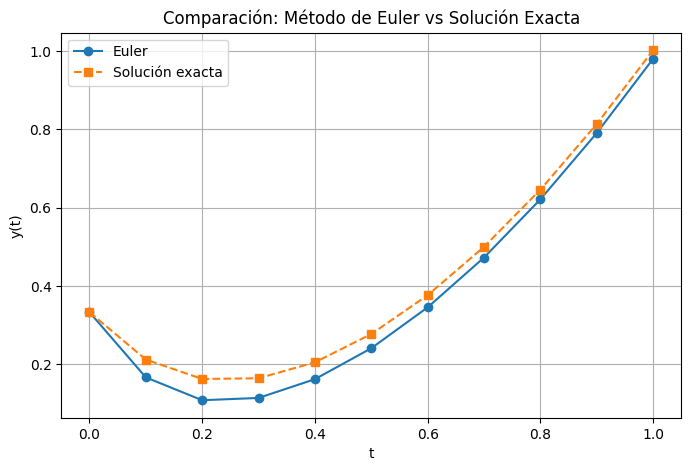

In [2]:
import matplotlib.pyplot as plt

# Solución exacta
def y_real(t):
    return t**2 + (1/3)*np.exp(-5*t)

# Calcular la solución real en los mismos puntos
y_exact = [y_real(t) for t in ts]

plt.figure(figsize=(8,5))
plt.plot(ts, ys, 'o-', label='Euler')
plt.plot(ts, y_exact, 's--', label='Solución exacta')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación: Método de Euler vs Solución Exacta')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def error_relativo_promedio(N):
    ys, ts, h = ODE_euler(a, b, f, y_t0, N)
    y_exact = [y_real(t) for t in ts]
    errores = [abs((y_aprox - y_exacto)/y_exacto) for y_aprox, y_exacto in zip(ys, y_exact)]
    return np.mean(errores)

for N in [5, 10, 20]:
    eN = error_relativo_promedio(N)
    print(f"eN={N} = {eN:.5e}")